# Sentiment analysis with the Perceptron algorithm & statsmodels

In [1]:
%run Coding_perceptron_algorithm.ipynb # Import the code we wrote

from matplotlib import pyplot as plt
import numpy

numpy.random.seed(0) # So we get the same results

## Example 1

Our dataset will have a few points and two classes, 1 and 0.

In [2]:
features = numpy.array([
     [0,2],
     [1,0],[1,1],[1,2],[1,3],
     [2,2],[2,3],[3,2]
    ])
labels = numpy.array([0,0,0,0,1,1,1,1])

data = numpy.column_stack((features, labels))

### Plotting the points

We only need the full array because matplotlib doesn't support passing in multiple markers. We're also giving our guess for a splitting line.

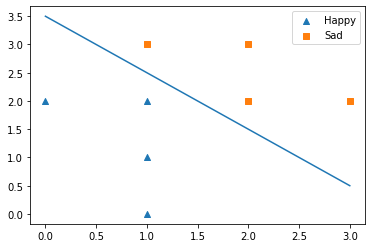

In [3]:
plot_scatter(data[labels == 0,0], data[labels == 0,1], marker = '^')
plot_scatter(data[labels == 1,0], data[labels == 1,1], marker = 's')
plt.legend(["Happy", "Sad"])
draw_line(-1,3.5, ending = 3)
plt.show()

### Some pieces of the perceptron algorithm

In [4]:
#weights = [1,1]
#bias = -3.5
weights = numpy.array([1,2])
bias = -4

# 
for i in range(len(features)):
    print(
        prediction(features[i], weights, bias),
        calculate_score(features[i], weights, bias),
        calculate_error(features[i], weights, bias, labels[i]),
        )

1 0 0
0 -3 0
0 -1 0
1 1 1
1 3 0
1 2 0
1 4 0
1 3 0


In [5]:
calculate_mean_perceptron_error(features, weights, bias, labels)

0.125

In [6]:
# weights_i, bias_i
perceptron_trick(features[6], weights, bias, 0)

(array([0.98, 1.97]), -4.01)

### Running the full algorithm

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]


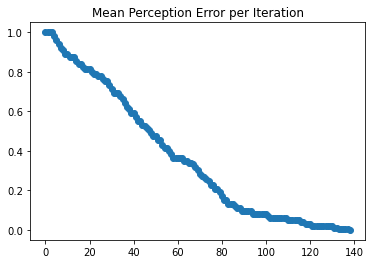

[0.47 0.09] -0.6800000000000004


In [7]:
weights, bias = perceptron_algorithm(features, labels)
print(weights, bias)

### Plotting our results

The weights we get are the coefficients of the line (plane). In our case, the weights and bias describe the line Ax + By + C = 0, so we have to calculate y = -Ax/B - C/B to get our slope and constant term.

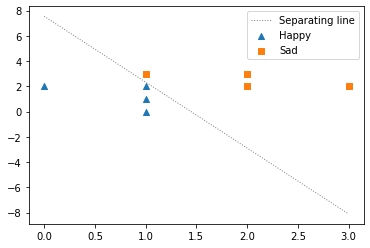

In [8]:
plot_scatter(data[labels == 0,0], data[labels == 0,1], marker = '^')
plot_scatter(data[labels == 1,0], data[labels == 1,1], marker = 's')
draw_line(
    -weights[0]/weights[1], # slope
    -bias/weights[1], # constant
    ending = 3,
    color='grey', linewidth=1.0, linestyle='dotted')
plt.legend(["Separating line", "Happy", "Sad"])
plt.show()

## Example 1 with statsmodels

In [9]:
import statsmodels.api as sm

exog = sm.add_constant(features) # adds an intercept column
model_logistic_regression = sm.Logit(
    endog = labels, 
    exog = exog)
# statsmodels will notify us if separation is perfect
model_logistic_regression.raise_on_perfect_prediction = False
results_regression = model_logistic_regression.fit()

         Current function value: 0.000000
         Iterations: 35


C:\Users\Peanut\miniconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [10]:
results_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:                          Logit   Df Residuals:                        5
Method:                           MLE   Df Model:                            2
Date:                Mon, 16 Aug 2021   Pseudo R-squ.:                   1.000
Time:                        00:02:50   Log-Likelihood:            -1.5140e-11
converged:                      False   LL-Null:                       -5.5452
Covariance Type:            nonrobust   LLR p-value:                  0.003906
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -236.2360   2.05e+08  -1.15e-06      1.000   -4.03e+08    4.03e+08
x1            59.8652   3.89e+07   1.54e-06      1.000   -7.62e+07    7.62e+07
x2            70.7097   7.76e+07   9.12e-07      1.000   -1.52e+08    1.52e+08
==============================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

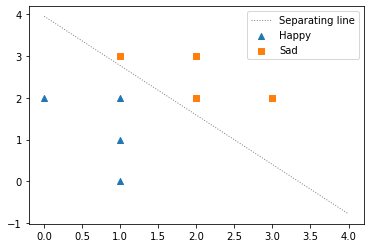

In [11]:
plot_scatter(data[labels == 0,0], data[labels == 0,1], marker = '^')
plot_scatter(data[labels == 1,0], data[labels == 1,1], marker = 's')
draw_line(
    -results_regression.params[2]/results_regression.params[1],
    -results_regression.params[0]/results_regression.params[1],
    starting=0, 
    ending=sum(labels),
    color='grey', linewidth=1.0, linestyle='dotted')
plt.legend(["Separating line", "Happy", "Sad"])
plt.show()

## Example 2: Splitting points with a plane

We alluded to a plane multiple times. Now let's see it in practice

### Plotting a plane

We'll need to plot a plane by forming a grid of points.

In [12]:
def plot_plane(normal, constant, **kwargs):
    """
    Normal vector is the vector normal to the plane

    Obviously trying more than three dimemsions will cause some trouble
    """
    # Add an axes by creating x1, ..., x_n-1
    num_dimensions = len(normal) - 1
    grid_points = numpy.meshgrid(*[range(10)]*num_dimensions)
    grid_points = numpy.array(grid_points)
    # calculate corresponding z = -sum( xi*ai )/xn - constant
    z = 0
    for index, coefficient in enumerate(normal[:-1]):
        z += coefficient*grid_points[index]
    z = numpy.divide(z, normal[-1])
    z = numpy.add(z, constant)
    z = -z

    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')

    # plot the surface
    ax.plot_surface(*grid_points, z, alpha=0.2)

    return ax

### Defining our dataset and running the algorithm

  0%|                                                                                          | 0/300 [00:00<?, ?it/s]


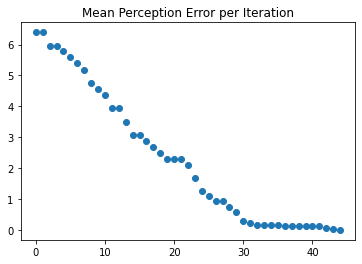

In [13]:
x = [numpy.random.randint(0,10, size = 3) for i in range(5)]
x = numpy.array(x)
y = [numpy.random.randint(0,2) for i in range(5)]
y = numpy.array(y)
w, b = perceptron_algorithm(x,y, learning_rate = 0.01, num_epochs = 300)

In [14]:
### Plotting our results

In [15]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget

In [16]:
ax = plot_plane(w,b)
ax.scatter(x[:,0], x[:,1], x[:,2], c = y)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …